Schema analysis
0. x coordinate
1. y coordinate
2. timestamp
3. pen-up vs. pen-down??
4. azimuth angle
5. altitude angle
6. Pressure

In [15]:
import pandas as pd
import numpy as np
import os
import locale
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.fftpack import fft, dct, idct
%matplotlib inline

In [16]:
filename="../../../00-DATASOURCES/02-ETHW/Protocolo temblor/T002/session00001/u00006s00001_hw00001.svc"
filenameC="../../../00-DATASOURCES/02-ETHW/Controles30jun14/C01/session00002/u00003s00002_hw000011.svc"

In [17]:
#features=['x','y','timestamp','pen_up','azimuth','altitude','pressure']
features=['x','y','timestamp','pen_up','pressure']
data = pd.read_csv(filename, sep="\s+",header=None,names=features,skiprows=1,usecols=[0,1,2,3,6])
control = pd.read_csv(filenameC, sep="\s+",header=None,names=features,skiprows=1,usecols=[0,1,2,3,6])

In [19]:
data['r'] = (data['x']**2+data['y']**2)**(1/2)
control['r'] = (control['x']**2+control['y']**2)**(1/2)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735 entries, 0 to 1734
Data columns (total 6 columns):
x            1735 non-null int64
y            1735 non-null int64
timestamp    1735 non-null int64
pen_up       1735 non-null int64
pressure     1735 non-null int64
r            1735 non-null float64
dtypes: float64(1), int64(5)
memory usage: 81.5 KB


In [21]:
data.head(10)

,x,y,timestamp,pen_up,pressure,r
0,5791,4520,925180,1,334,7346.160970
1,5791,4520,925188,0,0,7346.160970
2,5769,4471,925195,0,0,7298.712352
3,5749,4432,925203,0,0,7259.037471
4,5721,4385,925210,0,0,7208.194365
5,5685,4330,925218,0,0,7146.196541
6,5838,4451,925356,0,0,7341.229121
7,5837,4446,925378,0,0,7337.403151
8,5829,4436,925386,0,0,7324.980341
9,5500,4231,925516,0,0,6939.118172


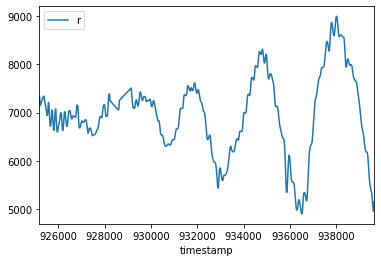

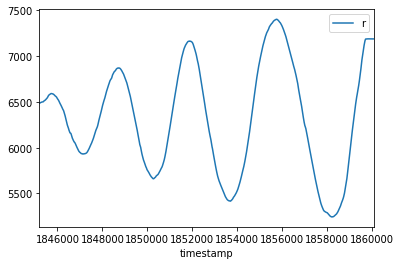

In [22]:
data.plot(x=2,y='r')
control.plot(x=2,y='r')

In [23]:
# Calculo de dct II y dct inversa para obtener los coeficientes estimados
data['idct_x']=idct(dct(data['x'], norm='ortho'), norm='ortho')
data['idct_y']=idct(dct(data['y'], norm='ortho'), norm='ortho')
control['idct_x']=idct(dct(control['x'], norm='ortho'),norm='ortho')
control['idct_y']=idct(dct(control['y'], norm='ortho'),norm='ortho')

In [26]:
#calculo del radio basado en los residuos
data['rd']=((data['x']-data['idct_x'])**2+(data['y']-data['idct_y'])**2)**(1/2)
control['rd']=((control['x']-control['idct_x'])**2+(control['y']-control['idct_y'])**2)**2
data['test']=(data['x']-data['idct_x'])**2

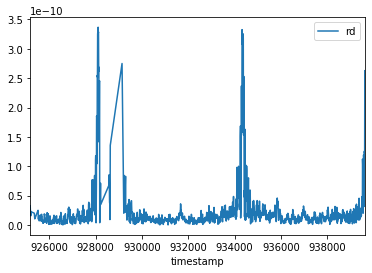

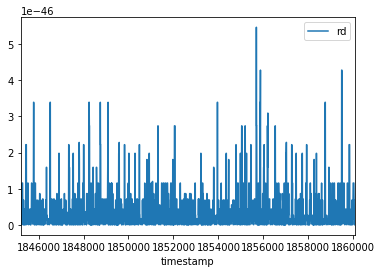

In [27]:
data.plot(x=2,y=['rd'])
control.plot(x=2,y=['rd'])